In [1]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import numpy as np
import pandas as pd
import scanpy as sc

import sys
sys.path.append("../../lib")
from deg_utils import DEGonAnnData
from pathways import genesDicts

In [8]:
model = 'WM4237'

In [9]:
dataPath = '../../data/'

ids = sorted(np.loadtxt(dataPath + 'ids_%s_ST.txt' % model, dtype=str))
print(ids)

['WM4237_T0_S1_ST', 'WM4237_T0_S2_ST', 'WM4237_T1_S1_ST', 'WM4237_T1_S2_ST', 'WM4237_T2_S1_ST', 'WM4237_T2_S2_ST', 'WM4237_T3_S1_ST', 'WM4237_T3_S2_ST', 'WM4237_T4_S1_ST', 'WM4237_T4_S2_ST', 'WM4237_TC_S1_ST', 'WM4237_TC_S2_ST', 'WM4237_TE_S1_ST', 'WM4237_TE_S2_ST', 'WM4237_TE_S3_ST', 'WM4237_TE_S4_ST']


In [10]:
ad_all = sc.read(dataPath + 'ad_all_human_clustered_st_%s.h5ad' % model)
ad_all.shape

(18406, 18720)

# Untreated all vs all clusters

In [20]:
ad_sel = ad_all[ad_all.obs['T'].isin(['T0', 'TC', 'TE']), :]
identity = 'cluster'
print(ad_sel.obs[identity].value_counts().sort_index())
DEGonAnnData(ad_sel, identity=identity, fdr=5*10**-2, nameAppend='U_all_vs_all', minPct=0.10, downsample=300, logfc_threshold=0.15)

0     777
1    3276
2    2900
5    1778
6    2718
7       3
Name: cluster, dtype: int64
(1500, 10955) {'0': 300, '1': 300, '2': 300, '5': 300, '6': 300}
adata shape: (1500, 10955)
(1004, 6)
{'0': 322, '1': 103, '2': 65, '5': 20, '6': 491} 1001


<div>
    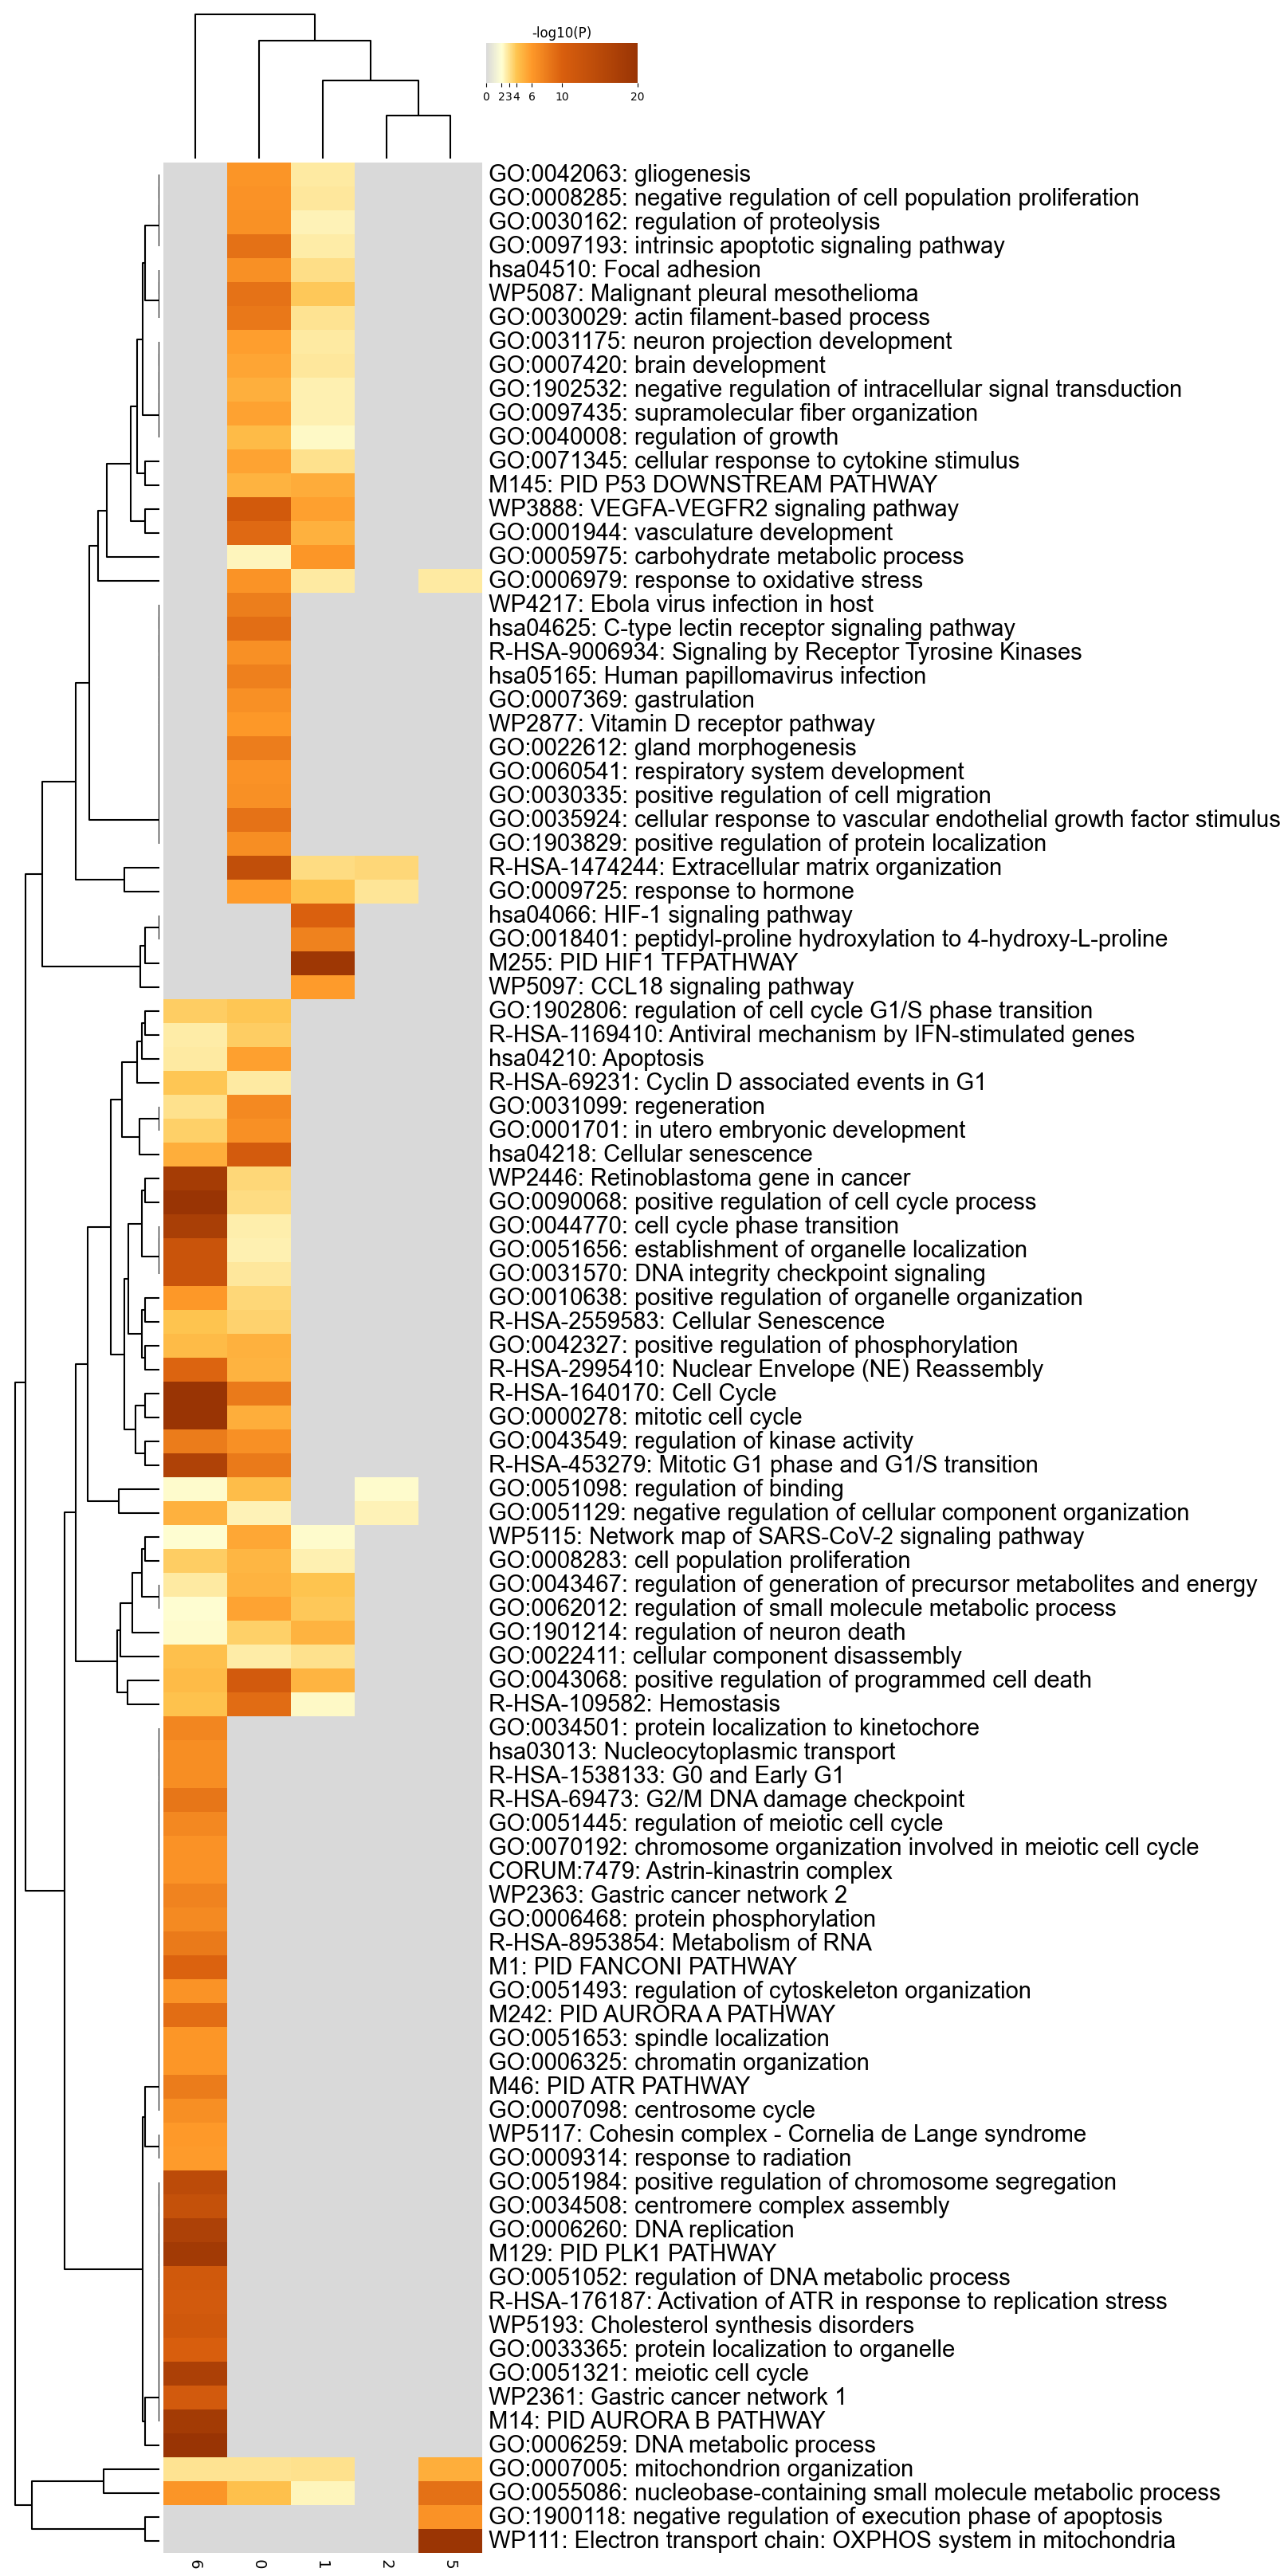
</div>

# Treated all vs all clusters

In [17]:
ad_sel = ad_all[ad_all.obs['T'].isin(['T1', 'T2', 'T3', 'T4']), :]
identity = 'cluster'
print(ad_sel.obs[identity].value_counts().sort_index())
DEGonAnnData(ad_sel, identity=identity, fdr=5*10**-2, nameAppend='T_all_vs_all', account_batch_var=True, batchvar='sample', minPct=0.10, downsample=300, logfc_threshold=0.2)

0      54
1      41
2     322
3    2530
4    1881
5      60
6     339
7    1350
8     377
Name: cluster, dtype: int64
(1955, 10072) {'2': 300, '3': 300, '4': 300, '6': 300, '7': 300, '8': 300, '5': 60, '0': 54, '1': 41}
adata shape: (1955, 10072)
Correcting for batch variable: sample
(4438, 6)
{'0': 88, '1': 114, '2': 549, '3': 33, '4': 597, '5': 20, '6': 1101, '7': 325, '8': 131} 2958


<div>
    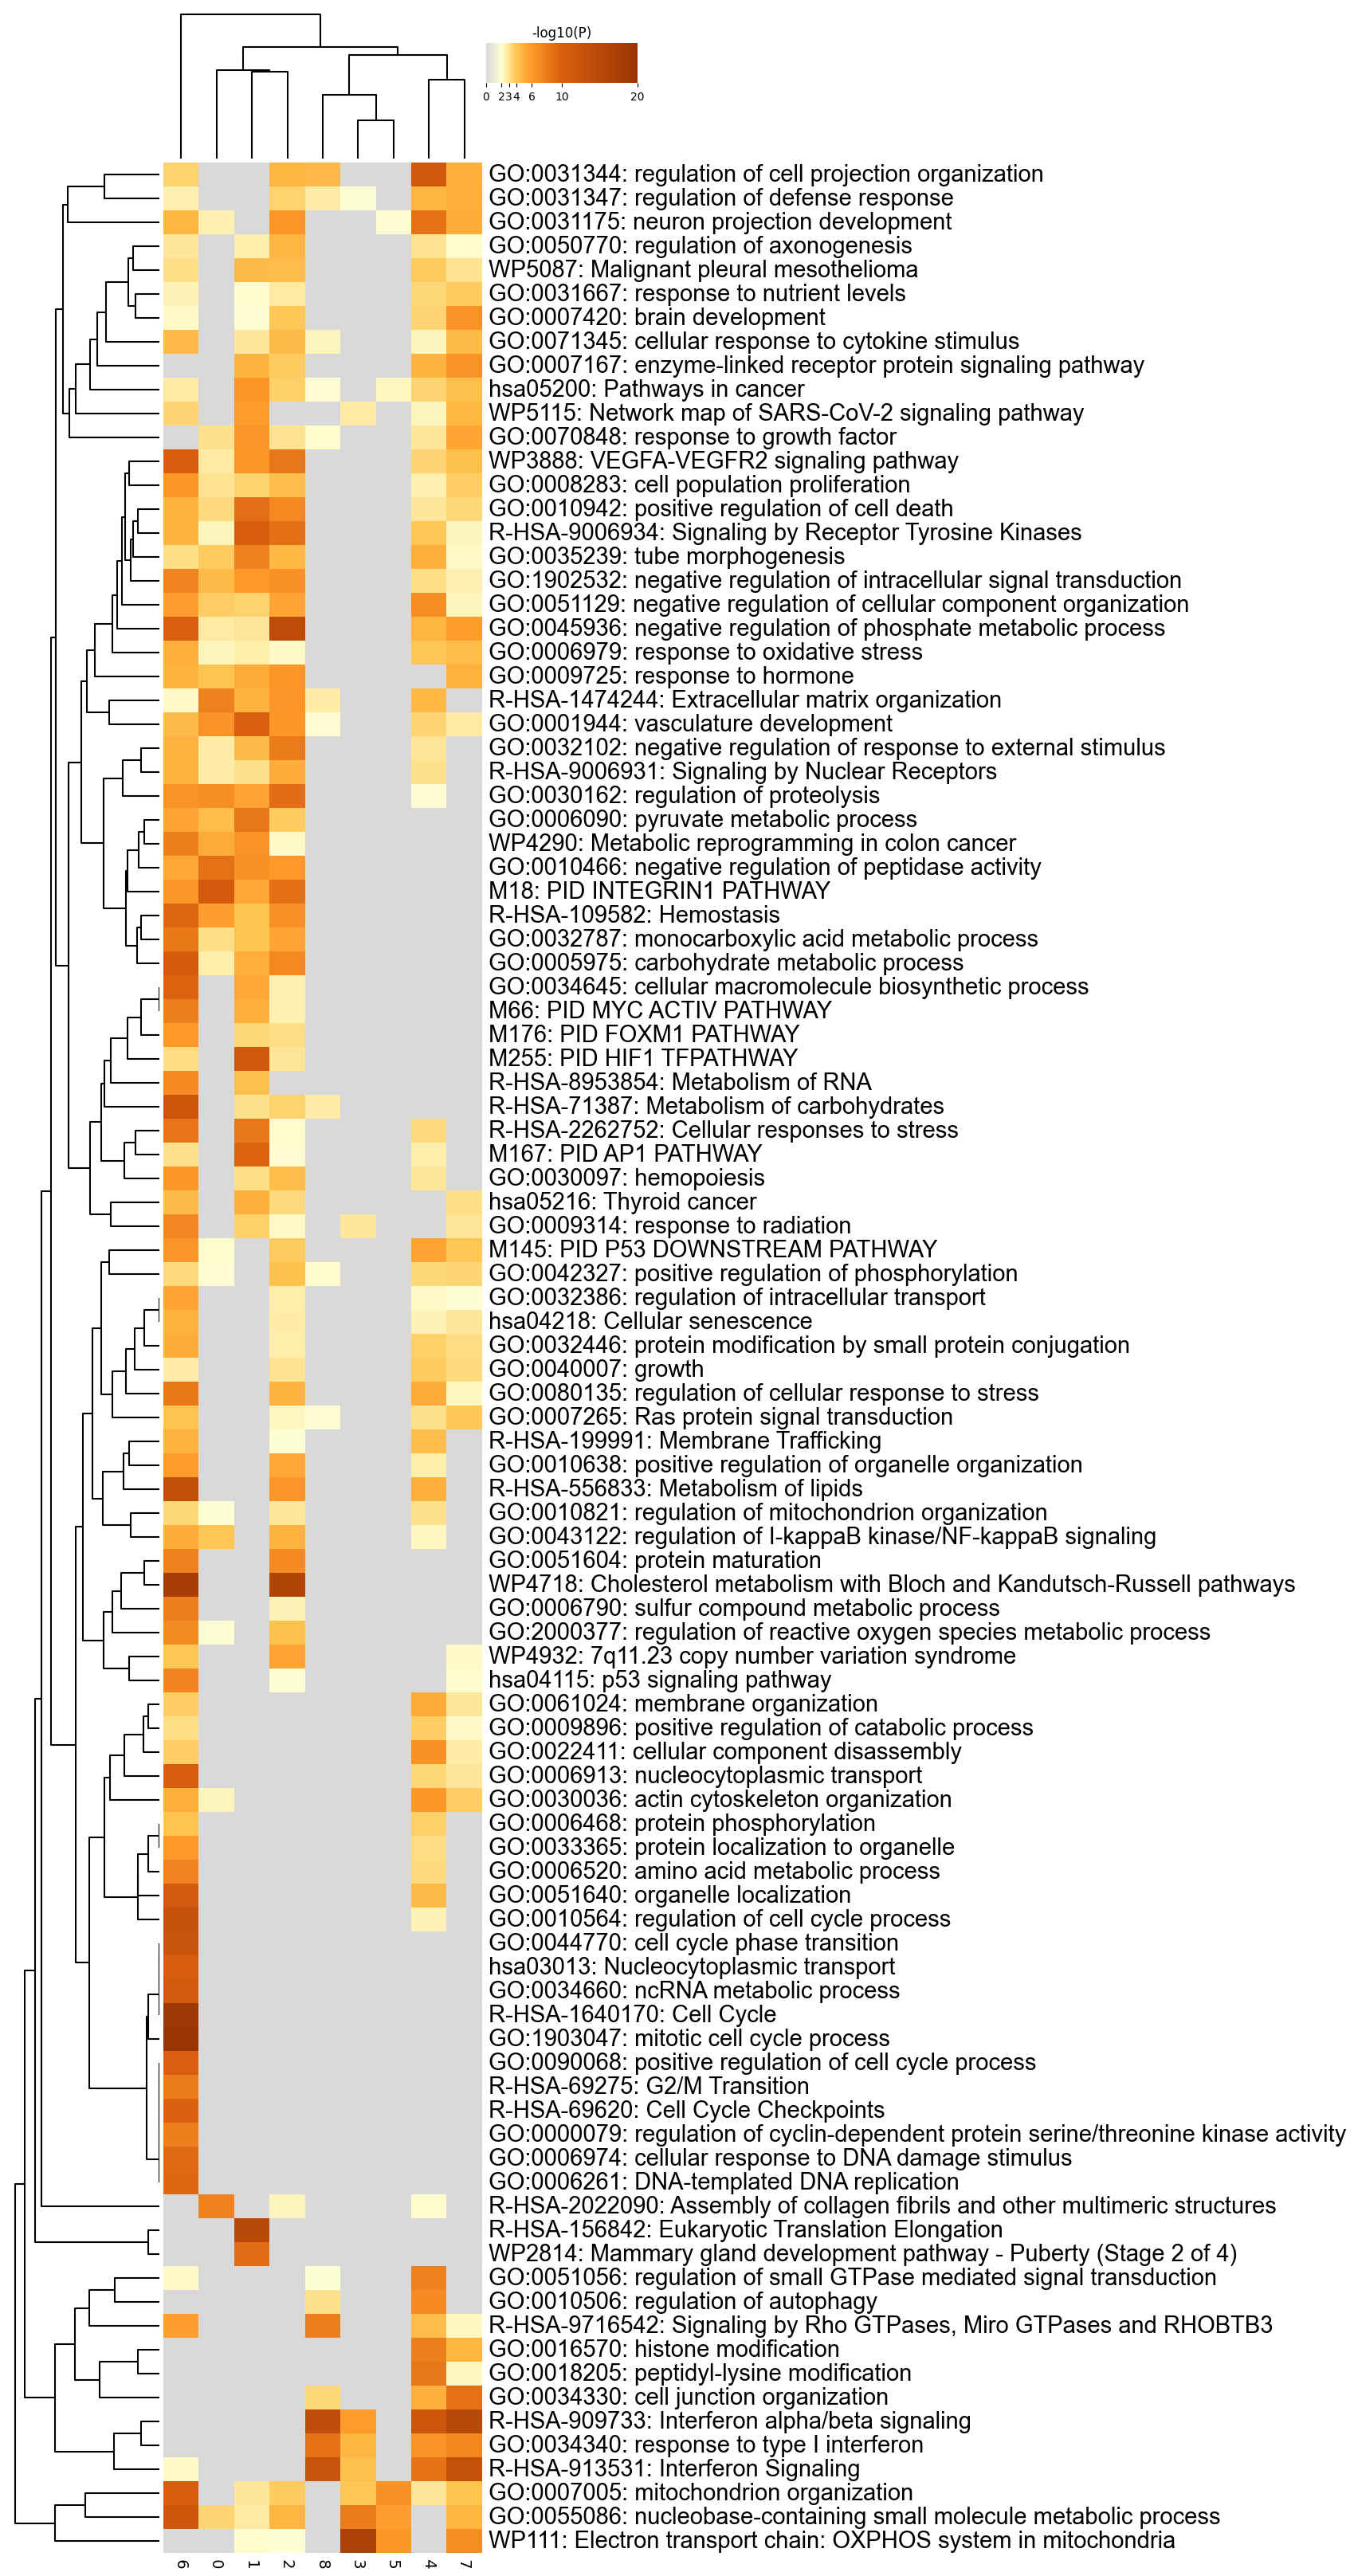
</div>

# Early vs late persisters

In [31]:
ad_sel = ad_all[(ad_all.obs['T'].isin(['T1', 'T4'])) & (ad_all.obs['cluster'].isin(['3'])), :]
identity = 'T'
print(ad_sel.obs[identity].value_counts().sort_index())
DEGonAnnData(ad_sel, identity=identity, fdr=5*10**-2, nameAppend='E_vs_L_persisters', minPct=0.10, downsample=300, logfc_threshold=0.2)

T1     171
T4    1142
Name: T, dtype: int64
(471, 7903) {'T4': 300, 'T1': 171}
adata shape: (471, 7903)
(2005, 6)
{'T1': 86, 'T4': 1334} 1420


<div>
    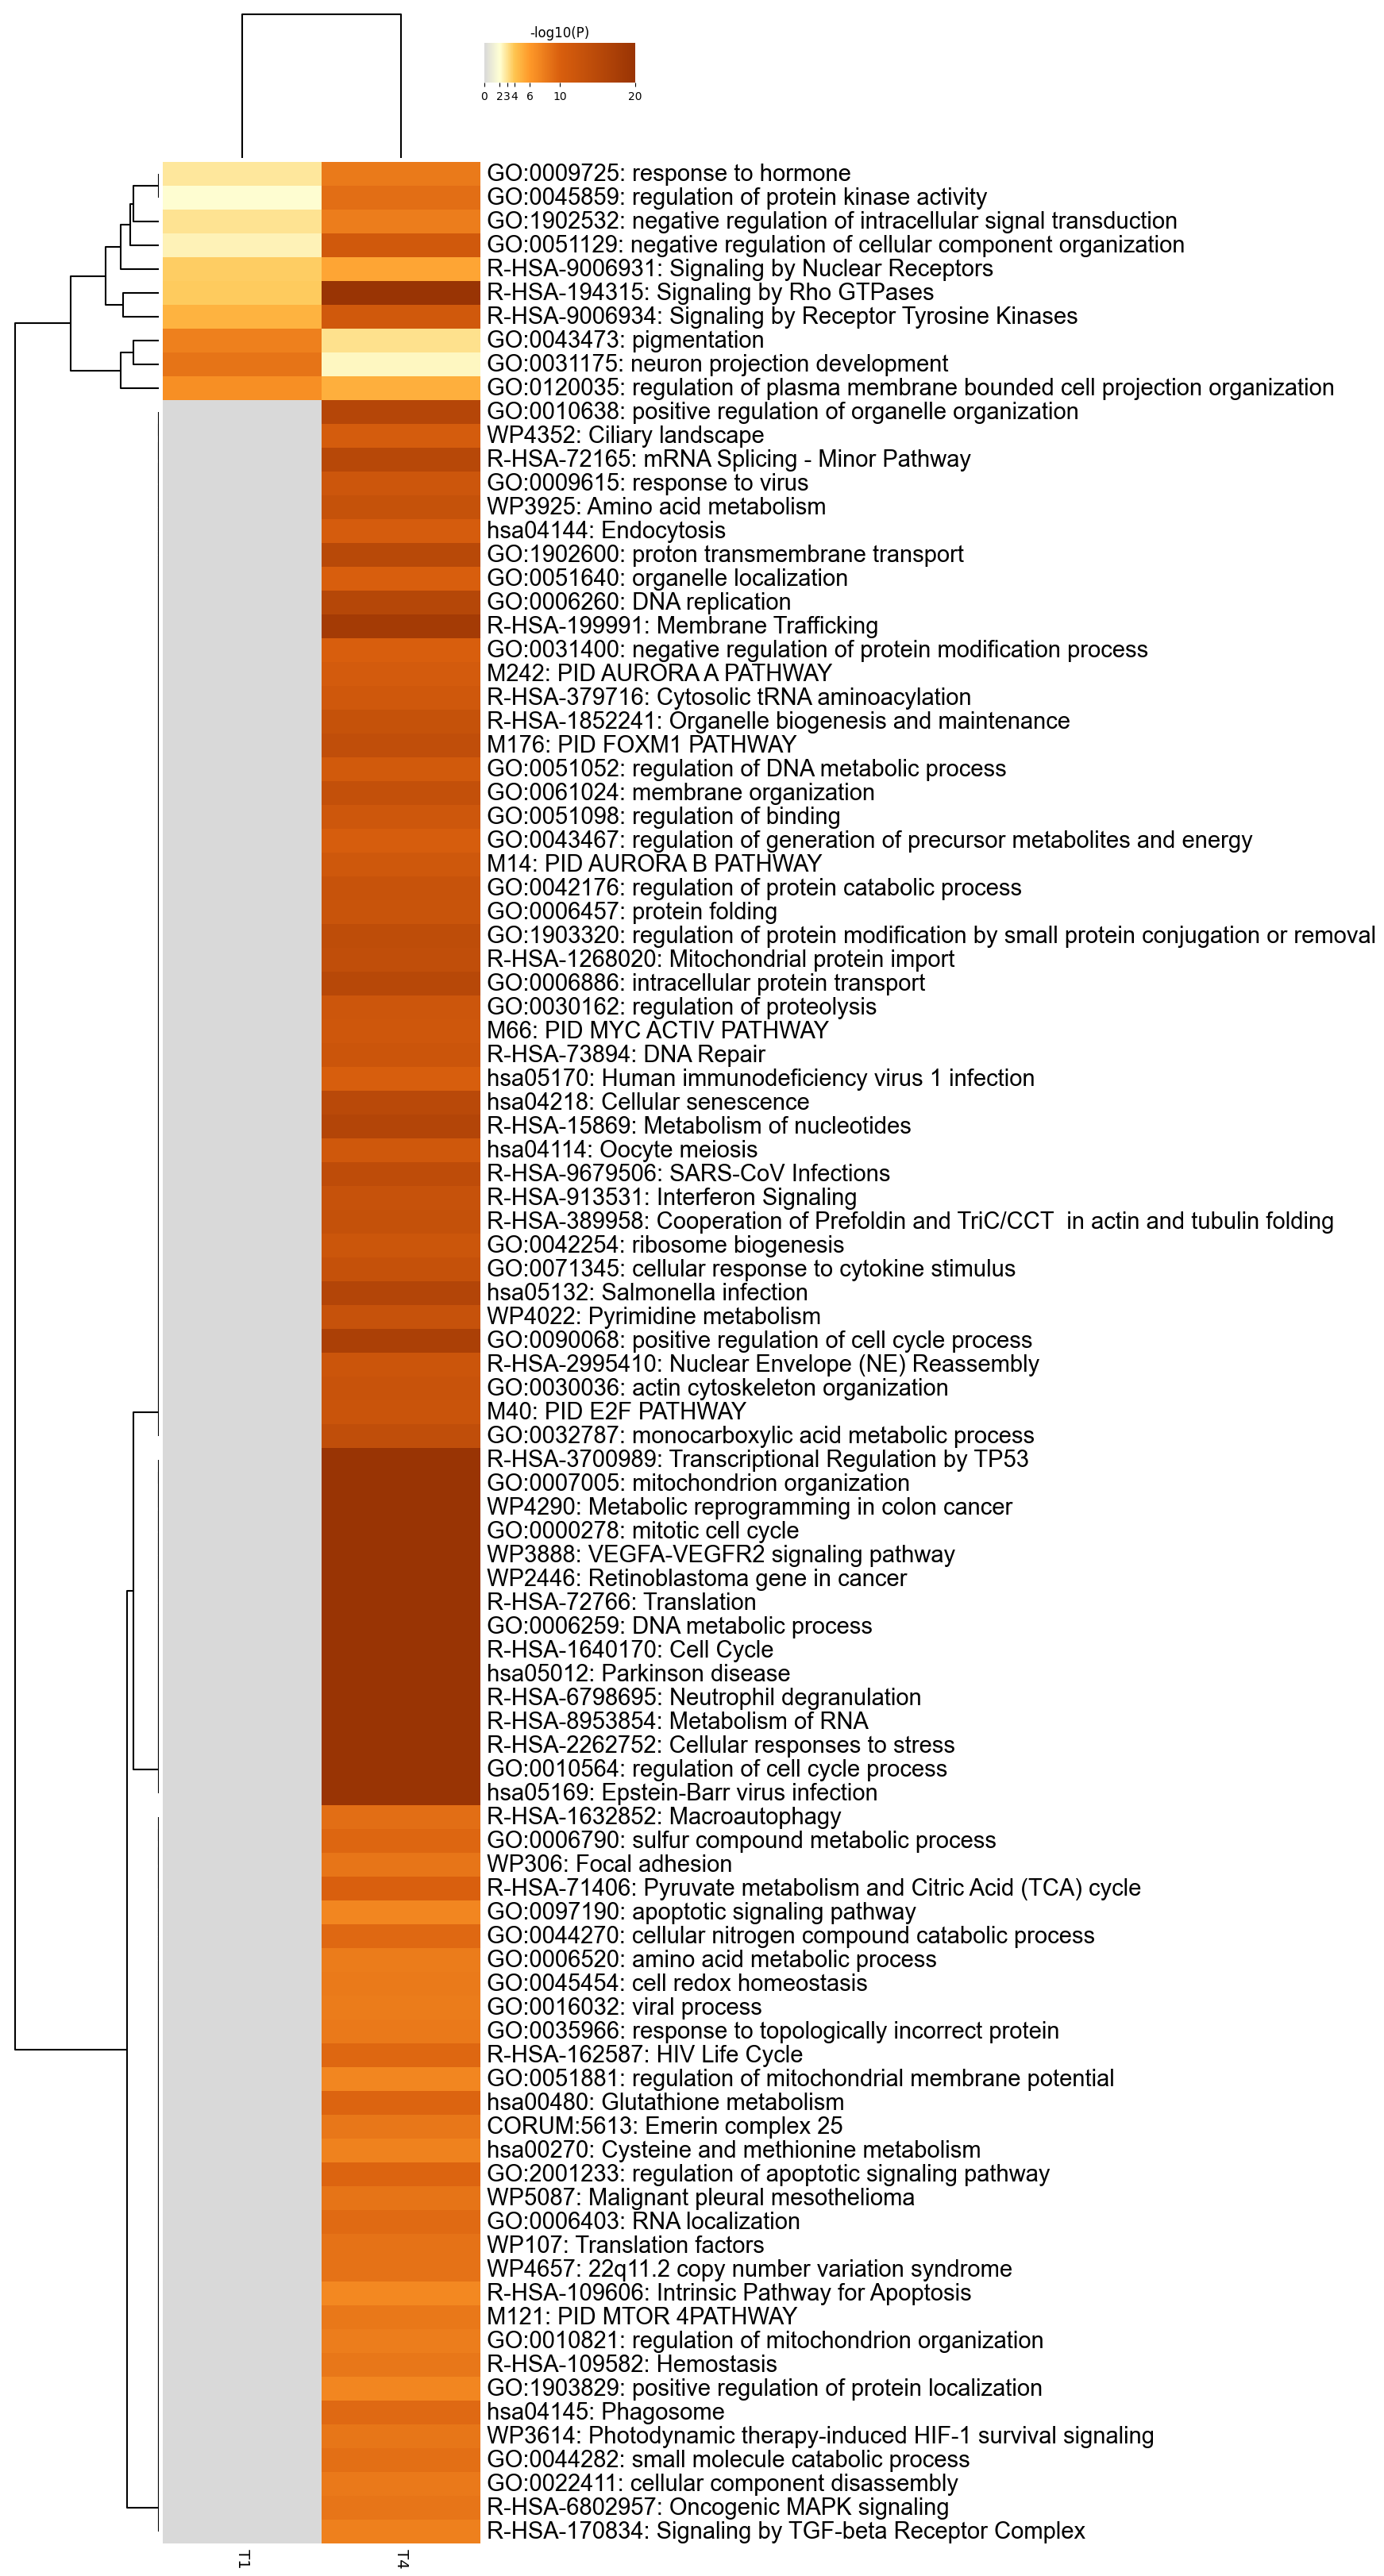
</div>

# Early sensitive vs late resistant

In [30]:
ad_sel = ad_all[(ad_all.obs['T'].isin(['T0', 'T4'])) & (ad_all.obs['cluster'].isin(['0', '1', '2', '5', '6'])), :]
identity = 'T'
print(ad_sel.obs[identity].value_counts().sort_index())
DEGonAnnData(ad_sel, identity=identity, fdr=5*10**-2, nameAppend='E_vs_L_resistant', minPct=0.10, downsample=300, logfc_threshold=0.20)

T0    4960
T4     738
Name: T, dtype: int64
(600, 10839) {'T0': 300, 'T4': 300}
adata shape: (600, 10839)
(526, 6)
{'T0': 135, 'T4': 375} 510


<div>
    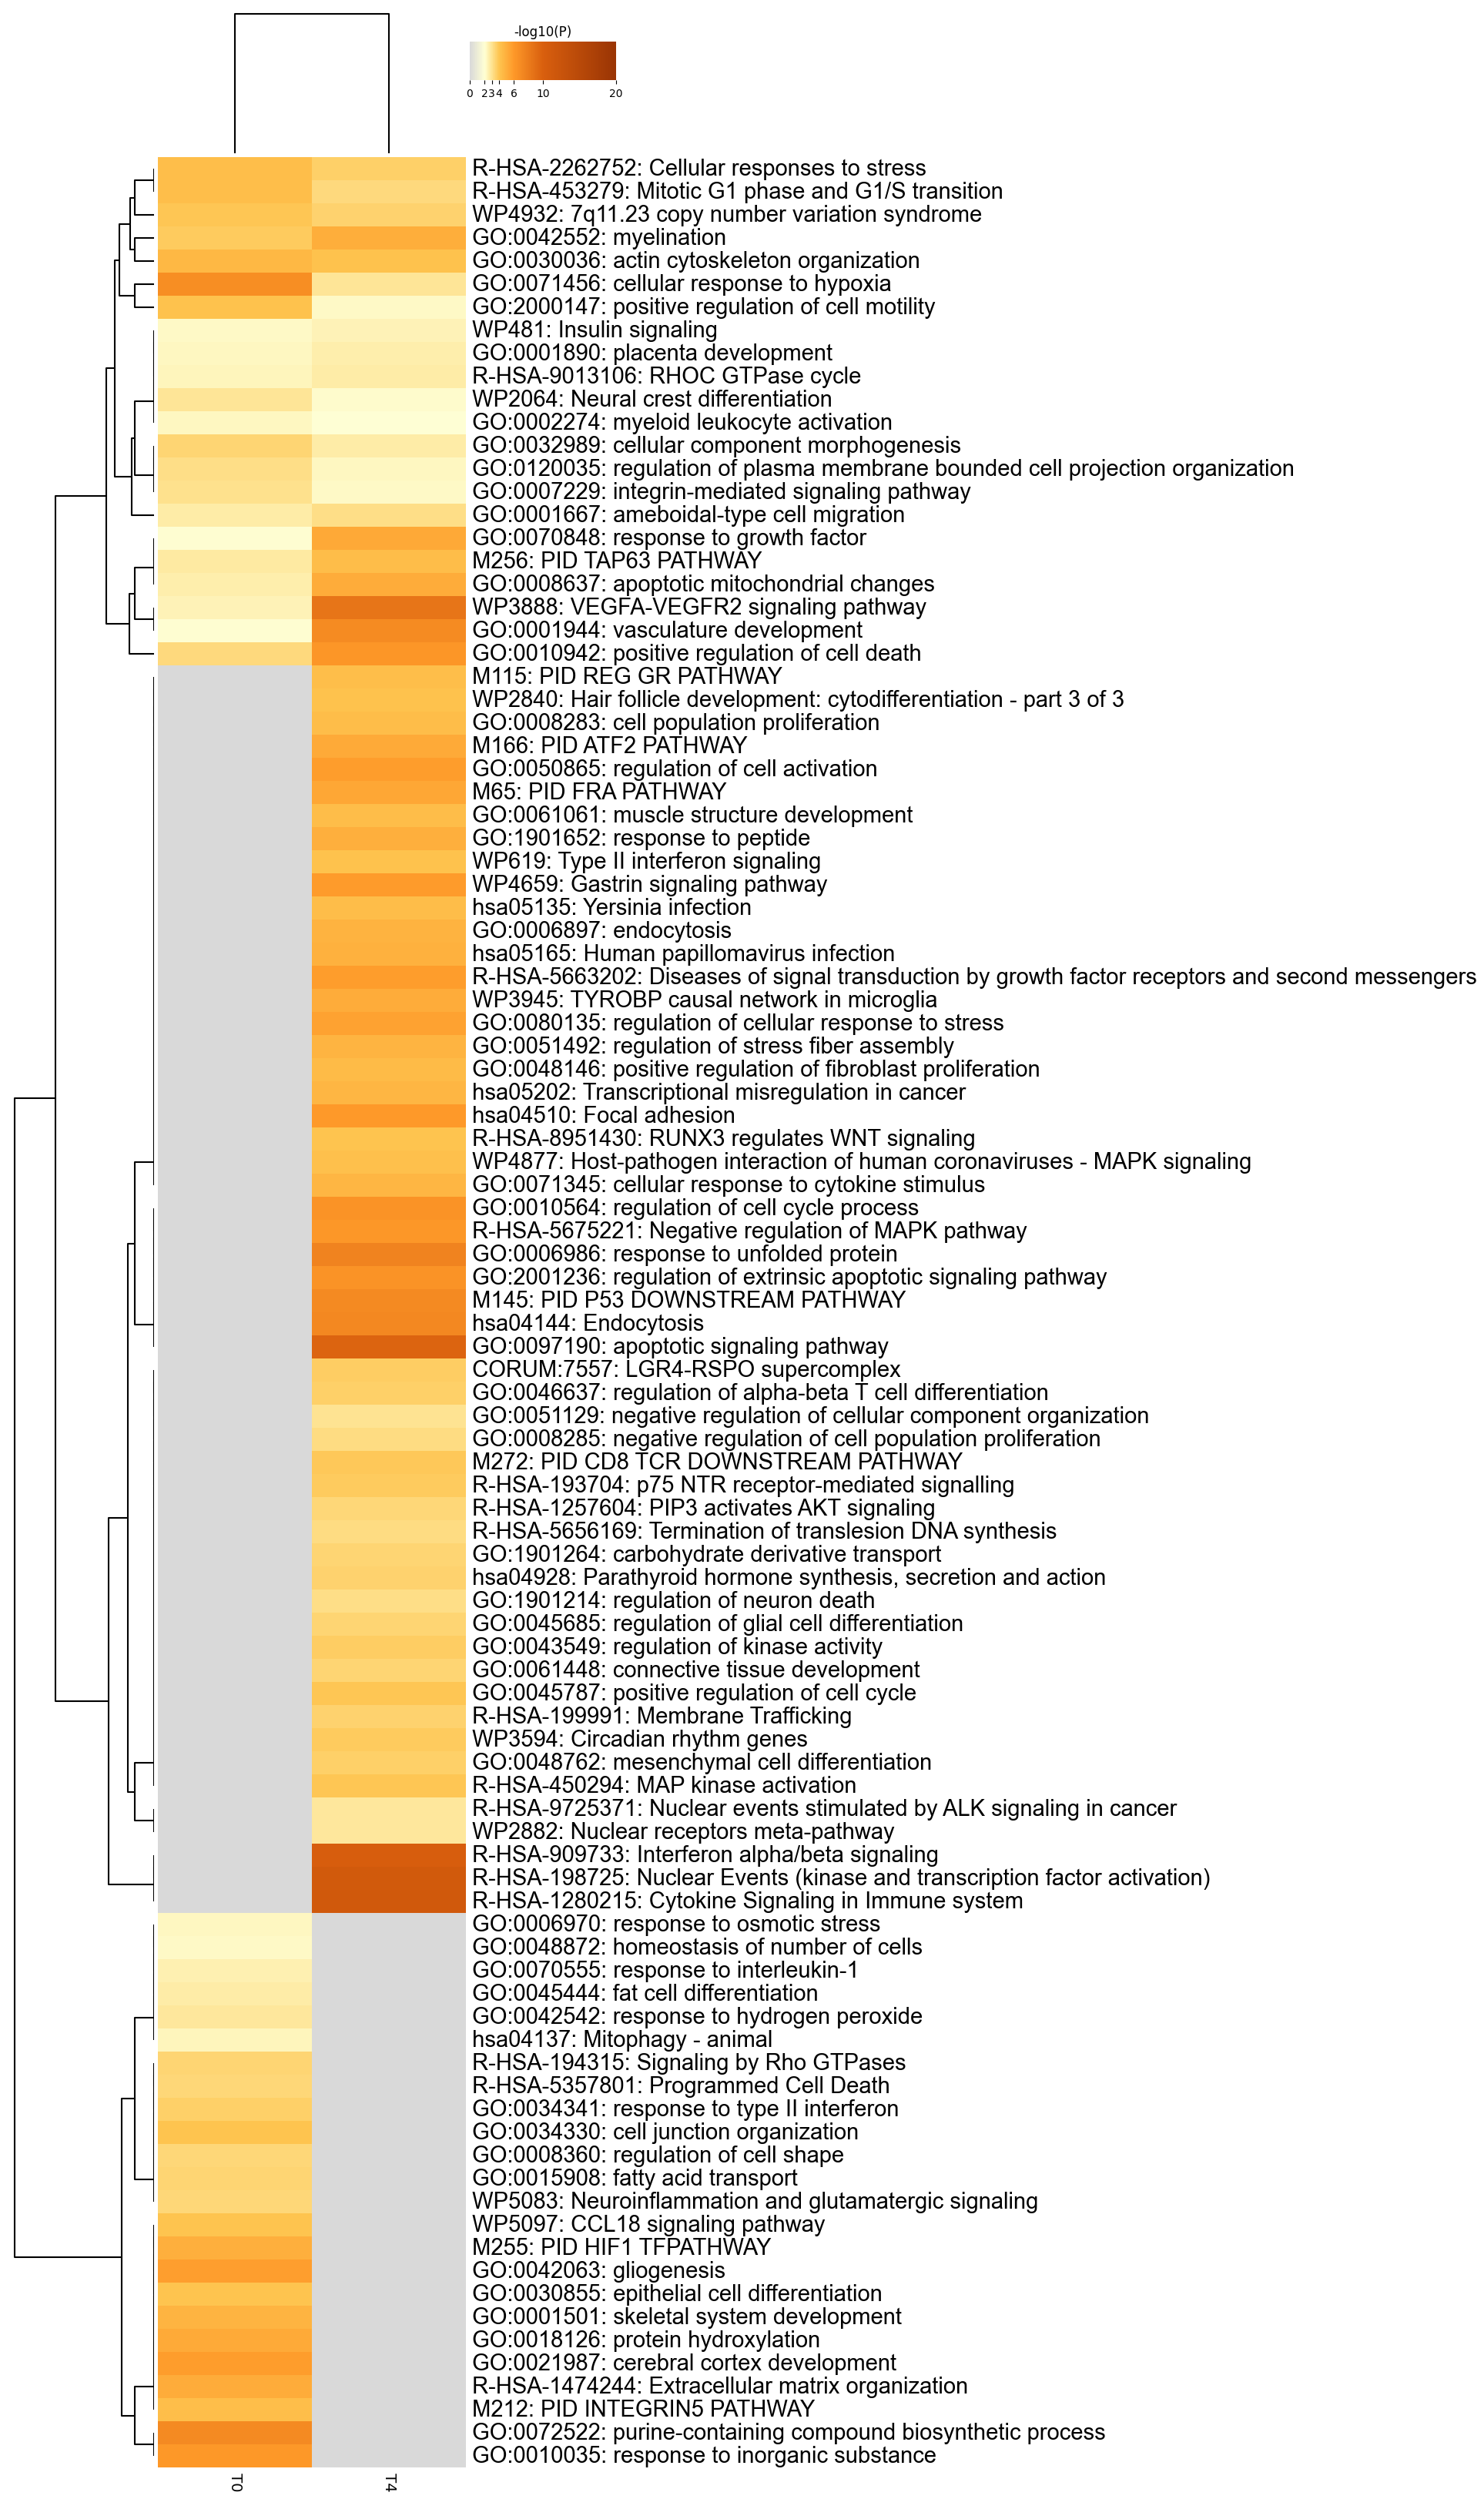
</div>